## Assignment 1 - Exploratory Data Analysis

#### Step 1: Find and download a dataset.

In [33]:
# StreetEasy is New York City’s leading real estate marketplace. You will be working with a
# dataset that contains a sample of 5,000 rentals listings in Manhattan.
# https://www.kaggle.com/zohaib30/streeteasy-dataset?select=manhattan.csv

In [34]:
# imports
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics
import pandas                as pd
import matplotlib.pyplot     as plt

In [35]:
manhattan = pd.read_csv('manhattan.csv')
manhattan.shape
#below we can see our dataset has 3539 rows and 18 columns 

(3539, 18)

#### Step 2: Divide into a training set and a testing set. Use scikitlearn to divide you data into training and testing sets. Make sure that the testing and training sets are balanced in terms of target classes

In [36]:
y = manhattan["rent"]
print(y.head())

0     2550
1    11500
2     4500
3     4795
4    17500
Name: rent, dtype: int64


In [37]:
X = manhattan.drop(["rent"], axis=1)
print(X.head())

   rental_id  bedrooms  bathrooms  size_sqft  min_to_subway  floor  \
0       1545       0.0          1        480              9    2.0   
1       2472       2.0          2       2000              4    1.0   
2       2919       1.0          1        916              2   51.0   
3       2790       1.0          1        975              3    8.0   
4       3946       2.0          2       4800              3    4.0   

   building_age_yrs  no_fee  has_roofdeck  has_washer_dryer  has_doorman  \
0                17       1             1                 0            0   
1                96       0             0                 0            0   
2                29       0             1                 0            1   
3                31       0             0                 0            1   
4               136       0             0                 0            1   

   has_elevator  has_dishwasher  has_patio  has_gym       neighborhood  \
0             1               1          0      

In [38]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.40)

In [39]:
X_train.shape #60% of the data

(2123, 17)

In [40]:
X_test.shape #40% of the data

(1416, 17)

#### Step 3: Explore your training set. Import your data into a Pandas data frame and use the following pandas functions to explore your data

In [41]:
X_train.describe() 

,rental_id,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000
mean,5280.276967,1.357984,1.375412,944.876119,4.879416,11.898022,51.308526,0.401790,0.152143,0.165332,0.280264,0.295808,0.185115,0.048045,0.176637
std,3316.279919,0.966555,0.603866,472.785072,5.285583,11.069380,39.461150,0.490375,0.359244,0.371568,0.449234,0.456513,0.388483,0.213912,0.381451
min,5.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2386.000000,1.000000,1.000000,620.000000,2.000000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4996.000000,1.000000,1.000000,800.000000,4.000000,8.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8153.000000,2.000000,2.000000,1152.000000,6.000000,17.000000,89.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,11348.000000,5.000000,4.000000,3500.000000,43.000000,83.000000,180.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2123 entries, 1491 to 2732
Data columns (total 17 columns):
rental_id           2123 non-null int64
bedrooms            2123 non-null float64
bathrooms           2123 non-null int64
size_sqft           2123 non-null int64
min_to_subway       2123 non-null int64
floor               2123 non-null float64
building_age_yrs    2123 non-null int64
no_fee              2123 non-null int64
has_roofdeck        2123 non-null int64
has_washer_dryer    2123 non-null int64
has_doorman         2123 non-null int64
has_elevator        2123 non-null int64
has_dishwasher      2123 non-null int64
has_patio           2123 non-null int64
has_gym             2123 non-null int64
neighborhood        2123 non-null object
borough             2123 non-null object
dtypes: float64(2), int64(13), object(2)
memory usage: 298.5+ KB


#### Step 4: Data cleaning. Address any missing values in your training set. Include the code in your Jupyter notebook and create a second, cleaned, version of your dataset. Then apply the same procedure to you test set (if you are putting in replacement values use IMPUTER in scikitlearn).


In [43]:
X_train_cleaned = X_train.copy() # copy of train dataset

In [44]:
X_train_cleaned.isnull().sum() # not missing values

rental_id           0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64

In [45]:
# I'm dropping the borough column since this dataset is entirely about Manhattan
X_train_cleaned = X_train_cleaned.drop(["borough"], axis=1)

In [46]:
X_train_cleaned.head(3) # exploring new train dataset

,rental_id,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood
1491,9771,1.0,1,650,2,1.0,56,0,0,0,0,0,0,0,0,Upper East Side
194,6221,2.0,2,1150,12,35.0,27,1,1,0,1,1,1,1,1,Midtown East
2043,7048,1.0,1,750,7,3.0,116,0,0,0,0,0,0,0,0,East Village


In [24]:
X_test_cleaned = X_train.copy()

In [25]:
# I'm dropping the borough column since this dataset is entirely about Manhattan
X_test_cleaned = X_test_cleaned.drop(["borough"], axis=1)

In [26]:
X_test_cleaned.head(3) # exploring new test dataset

,rental_id,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood
1491,9771,1.0,1,650,2,1.0,56,0,0,0,0,0,0,0,0,Upper East Side
194,6221,2.0,2,1150,12,35.0,27,1,1,0,1,1,1,1,1,Midtown East
2043,7048,1.0,1,750,7,3.0,116,0,0,0,0,0,0,0,0,East Village


#### Step 5: Visualize the data in your training set. At a minimum, use the following pandas functions to visualize the data in your Jupyter notebook.

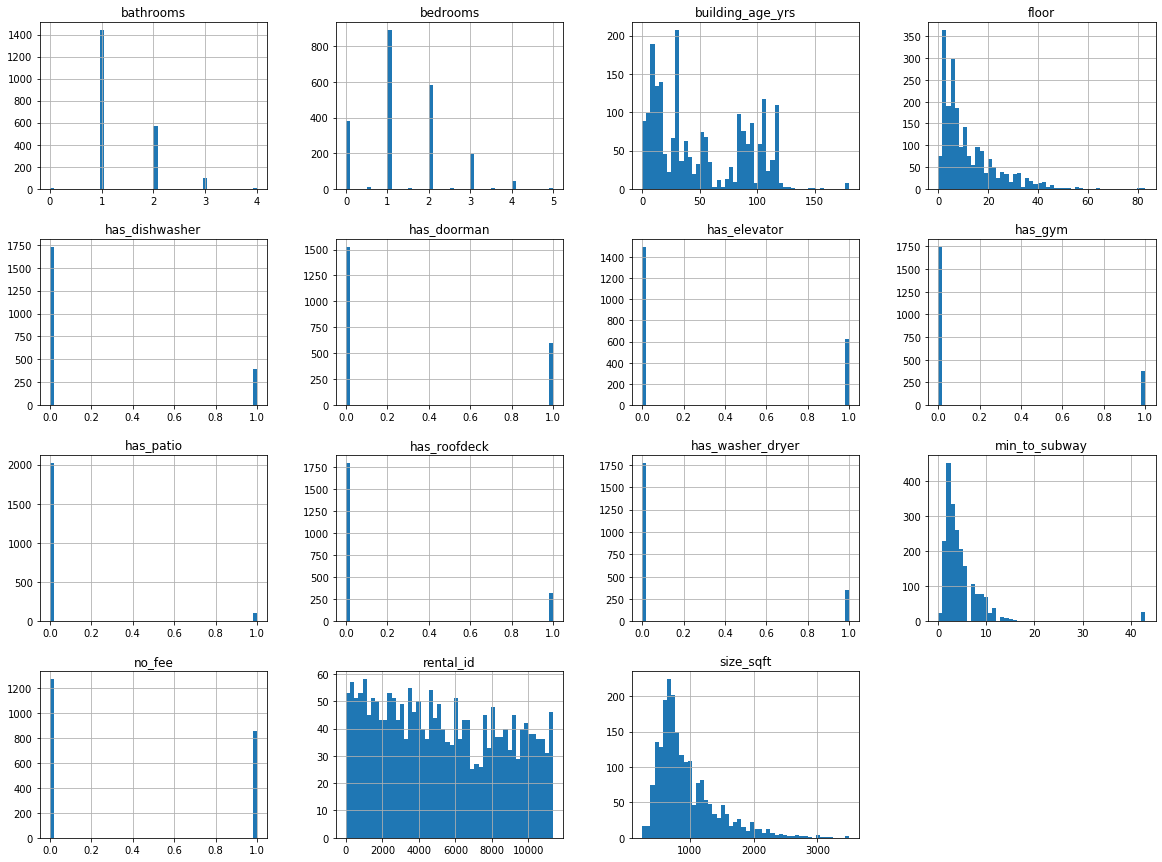

In [48]:
X_train_cleaned.hist(bins=50, figsize=(20,15)) 
plt.show() #histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EE9BF03C8>,
      dtype=object)

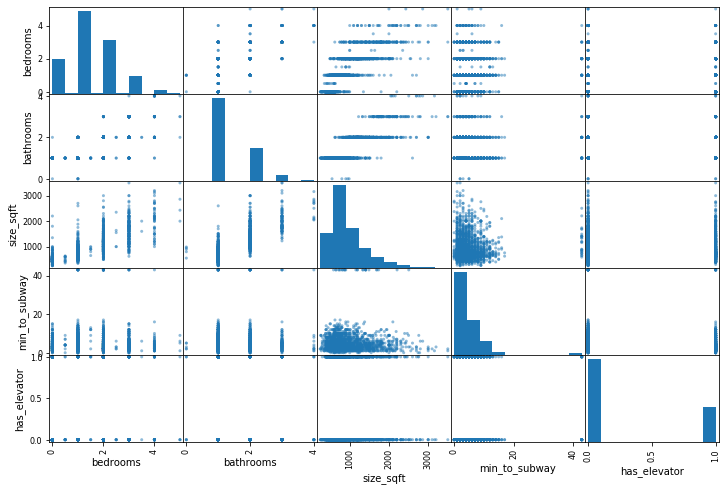

In [51]:
from pandas.plotting import scatter_matrix

attributes = ["bedrooms", "bathrooms", "size_sqft", "min_to_subway", "has_elevator"]
scatter_matrix(X_train_cleaned[attributes], figsize=(12, 8))
# this matrix was not very clear to me, so I used Seaborn the have sharper ilustrations 

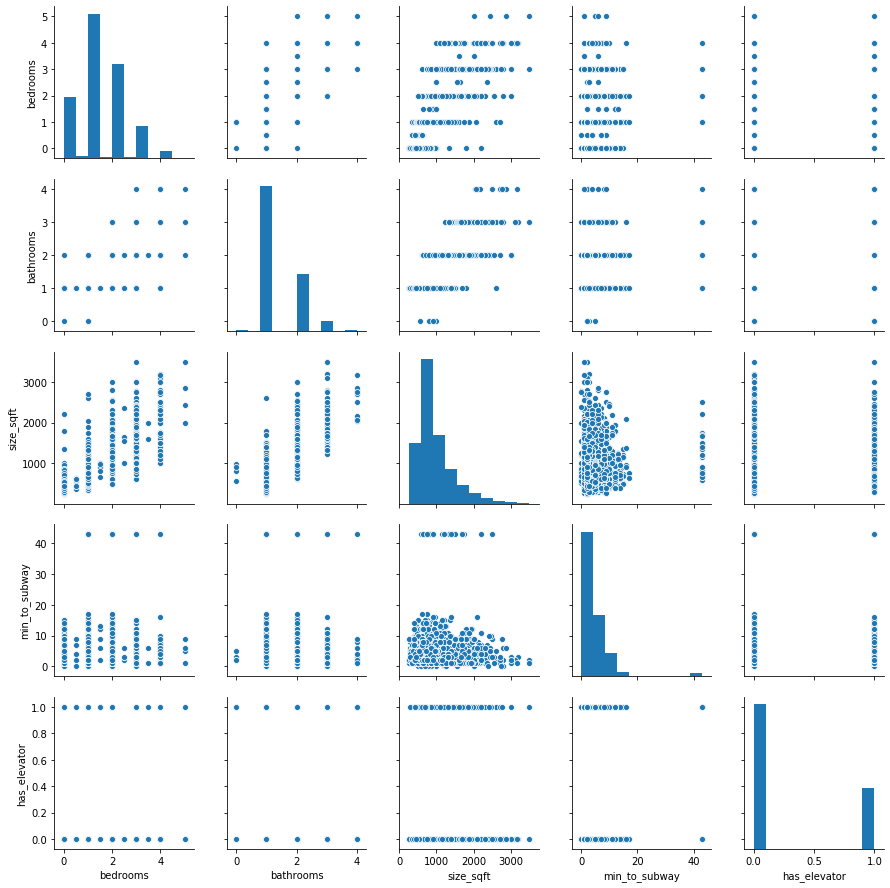

In [52]:
attributes = ["bedrooms", "bathrooms", "size_sqft", "min_to_subway", "has_elevator"]
sns.pairplot(X_train_cleaned[attributes])
# Better visualizations with Seaborn

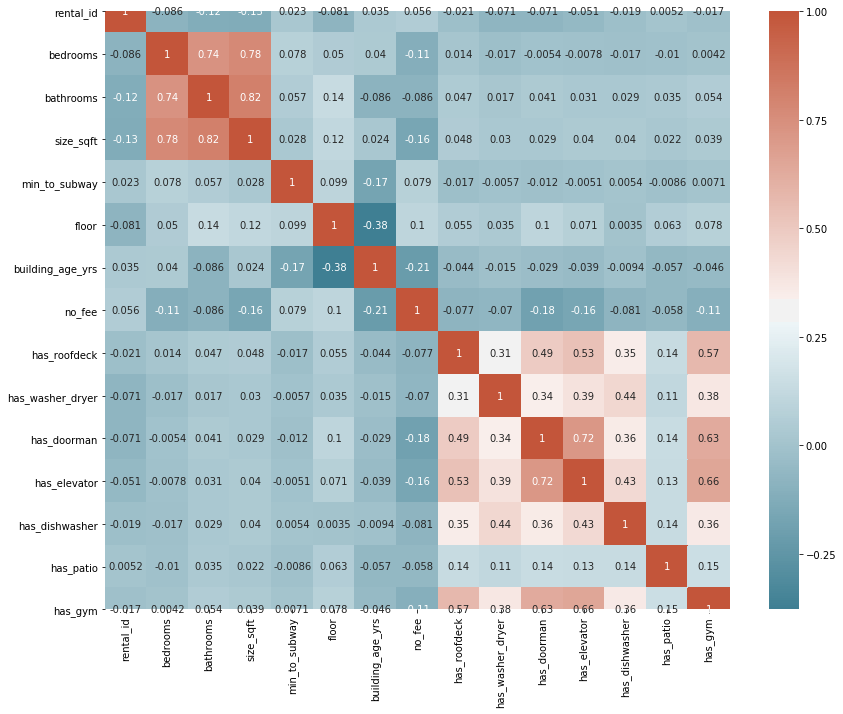

In [53]:
fig_dims = (14, 11)
fig, ax = plt.subplots(figsize=fig_dims)
corr = X_train_cleaned.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, ax=ax, cmap=sns.diverging_palette(220, 20, as_cmap=True))
# I plot this correlation matrix with colors to have a better of understand of the level of significance 
#relationships with bedroom, bathroom, and size_sqft have the highest levels

#### Step 6: Apply transformations to your data. In your Jupetyr notebook apply, squaring, cubing, logarithmic, and exponentials transformations to two features in your dataset. Plot the histograms and scatter matrices of the resultant data.

In [47]:
X_train_cleaned.var() # the data looks normal and well balanced

rental_id           1.099771e+07
bedrooms            9.342282e-01
bathrooms           3.646543e-01
size_sqft           2.235257e+05
min_to_subway       2.793738e+01
floor               1.225312e+02
building_age_yrs    1.557182e+03
no_fee              2.404680e-01
has_roofdeck        1.290564e-01
has_washer_dryer    1.380624e-01
has_doorman         2.018111e-01
has_elevator        2.084037e-01
has_dishwasher      1.509188e-01
has_patio           4.575843e-02
has_gym             1.455048e-01
dtype: float64

#### Transformations for Bedrooms

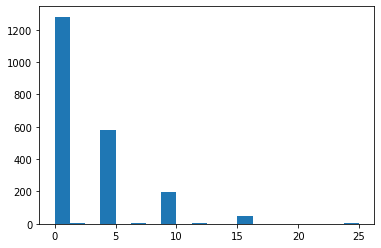

In [59]:
plt.hist(X_train_cleaned['bedrooms'].values.reshape(-1, 1)**2, bins=20)
plt.show() #using X**2

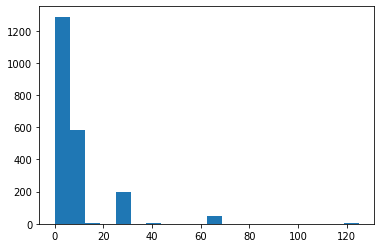

In [55]:
plt.hist(X_train_cleaned['bedrooms'].values.reshape(-1, 1)**3, bins=20)
plt.show() #using X**3

C:\Users\kathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


ValueError: supplied range of [-inf, 1.6094379124341003] is not finite

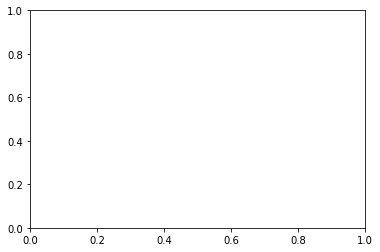

In [56]:
plt.hist(np.log(X_train_cleaned['bedrooms'].values.reshape(-1, 1)), bins=10)
plt.show() # the bedroom feature gives an error when trying to ng.log 

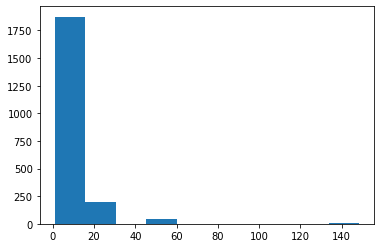

In [57]:
plt.hist(np.exp(X_train_cleaned['bedrooms'].values.reshape(-1, 1)), bins=10)
plt.show() #however it works well when using np.exp

#### Transformation for size_Sqft 

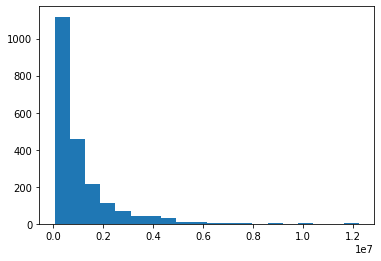

In [62]:
plt.hist(X_train_cleaned['size_sqft'].values.reshape(-1, 1)**2, bins=20)
plt.show() #using X**2

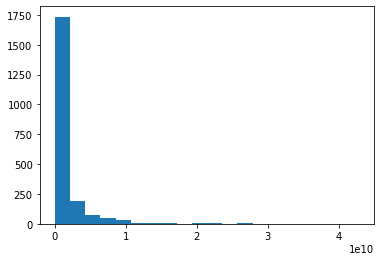

In [63]:
plt.hist(X_train_cleaned['size_sqft'].values.reshape(-1, 1)**3, bins=20)
plt.show() #using X**3

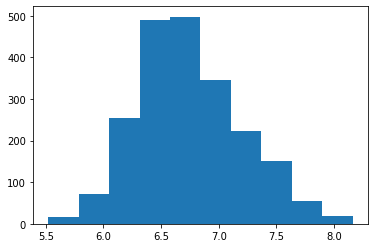

In [64]:
plt.hist(np.log(X_train_cleaned['size_sqft'].values.reshape(-1, 1)), bins=10)
plt.show() # using np.log

ValueError: supplied range of [3.7464546145026734e+108, inf] is not finite

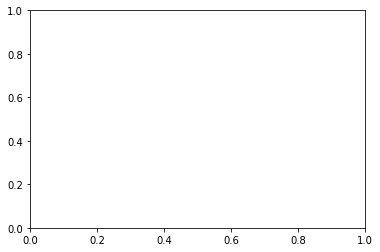

In [65]:
plt.hist(np.exp(X_train_cleaned['size_sqft'].values.reshape(-1, 1)), bins=10)
plt.show() #in this case I get an error when using np.exp

#### Scatter Matrix for the original data for bedrooms and size_sqft

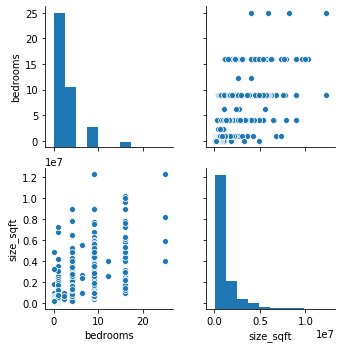

In [73]:
#scatter matrix for the squared data for bedrooms and size_sqft
attributes = ["bedrooms", "size_sqft"]
sns.pairplot(X_train_cleaned[attributes]**2)

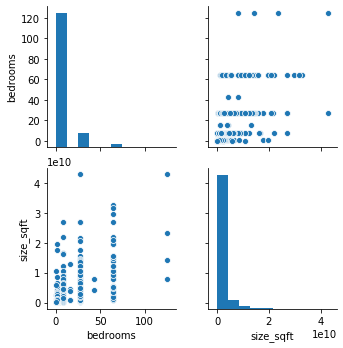

In [74]:
#scatter matrix for the cubed data for bedrooms and size_sqft
attributes = ["bedrooms", "size_sqft"]
sns.pairplot(X_train_cleaned[attributes]**3)